In [41]:
# 데이터 로드 및 전처리
# 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
# 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [42]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [43]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [44]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [45]:
# 모델 구성 및 컴파일
# 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               7168      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae'])

# 모델 학습
# epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/60
6/6 [==============================] - 1s 22ms/step - loss: 308.6099 - mae: 14.5099 - val_loss: 39.5879 - val_mae: 5.2596
Epoch 2/60
6/6 [==============================] - 0s 5ms/step - loss: 34.0539 - mae: 3.9685 - val_loss: 25.5919 - val_mae: 4.0843
Epoch 3/60
6/6 [==============================] - 0s 6ms/step - loss: 26.7603 - mae: 3.6500 - val_loss: 16.2778 - val_mae: 3.2112
Epoch 4/60
6/6 [==============================] - 0s 6ms/step - loss: 22.0386 - mae: 3.1857 - val_loss: 25.6362 - val_mae: 4.2082
Epoch 5/60
6/6 [==============================] - 0s 6ms/step - loss: 24.8648 - mae: 3.5075 - val_loss: 23.7045 - val_mae: 3.7526
Epoch 6/60
6/6 [==============================] - 0s 6ms/step - loss: 17.7126 - mae: 2.9472 - val_loss: 14.9951 - val_mae: 2.9789
Epoch 7/60
6/6 [==============================] - 0s 6ms/step - loss: 16.2133 - mae: 2.8798 - val_loss: 107.0778 - val_mae: 7.0744
Epoch 8/60
6/6 [==============================] - 0s 6ms/step - loss: 52.6086 - mae: 4

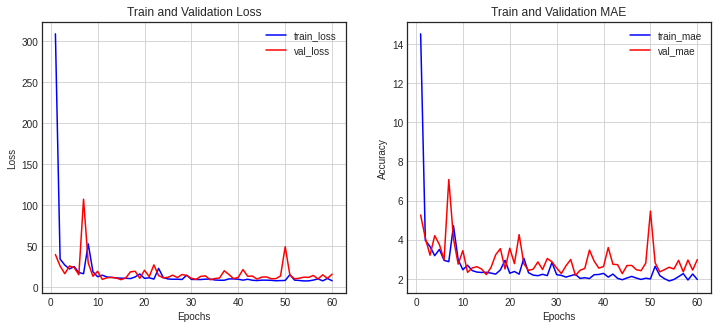

In [47]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [48]:
# 모델 평가 및 예측
# 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 24.1496 - mae: 3.7282


[24.149566650390625, 3.7281601428985596]

In [49]:
# 데이터 로드 및 전처리
# reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 
# 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 
# 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
# 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [50]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=0)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [51]:
# 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [52]:
# 모델 구성 및 컴파일
# BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))


In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
activation_6 (Activation)    (None, 128)              

In [54]:
# 모델 학습
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 2s 7ms/step - loss: 1.5860 - accuracy: 0.6427 - val_loss: 1.3240 - val_accuracy: 0.7409
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 0.9923 - accuracy: 0.7699 - val_loss: 0.9728 - val_accuracy: 0.7956
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7496 - accuracy: 0.8235 - val_loss: 0.9152 - val_accuracy: 0.8063
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.6149 - accuracy: 0.8529 - val_loss: 0.9214 - val_accuracy: 0.8099
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.4984 - accuracy: 0.8803 - val_loss: 0.9176 - val_accuracy: 0.8157
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.4403 - accuracy: 0.8959 - val_loss: 0.9039 - val_accuracy: 0.8161
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.3685 - accuracy: 0.9123 - val_loss: 0.9266 - val_accuracy: 0.8237
Epoch 

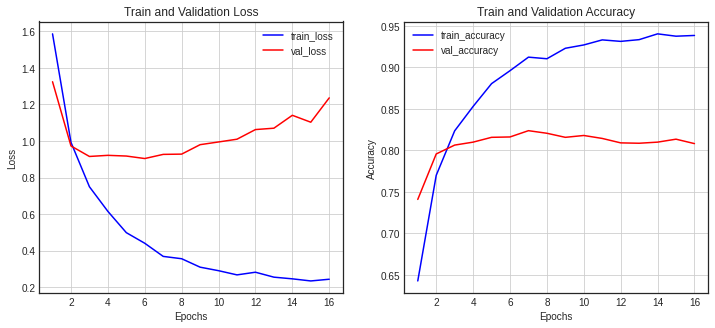

In [55]:
# 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [56]:
# 모델 평가 및 예측
# 테스트 데이터셋을 이용해 모델을 평가합니다.

# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

71/71 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.8001


In [57]:
# # 데이터 로드 및 전처리
# CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 
# 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
# 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [58]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=0)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [59]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

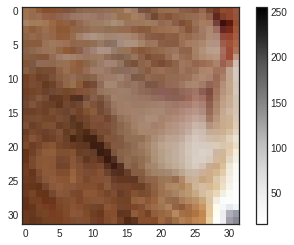

In [60]:
# 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [61]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [62]:
# 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1, 3072)
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [63]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [64]:
# 모델 구성 및 컴파일
# BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = layers.Input(shape=(3072, ))
hidden1 = layers.Dense(2048)(inputs)
bn1 = layers.BatchNormalization()(hidden1)
#activation_1 = layers.Dense(2048, activation='relu')(bn1)
activation_1 = layers.Activation('relu')(bn1)
drop_out_1 = layers.Dropout(0.5)(activation_1)
hidden2 = layers.Dense(1024)(drop_out_1)
bn2 = layers.BatchNormalization()(hidden2)
#activation_2 = layers.Dense(1024, activation='relu')(bn2)
activation_2 = layers.Activation('relu')(bn2)
drop_out_2 = layers.Dropout(0.5)(activation_2)
hidden3 = layers.Dense(512)(drop_out_2)
bn3 = layers.BatchNormalization()(hidden3)
#activation_3 = layers.Dense(512, activation='relu')(bn3)
activation_3 = layers.Activation('relu')(bn3)
drop_out_3 = layers.Dropout(0.5)(activation_3)
outputs = layers.Dense(512, activation='relu')(drop_out_3)
outputs = layers.Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)


In [65]:
model.summary()

from tensorflow.keras import utils

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_7 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096

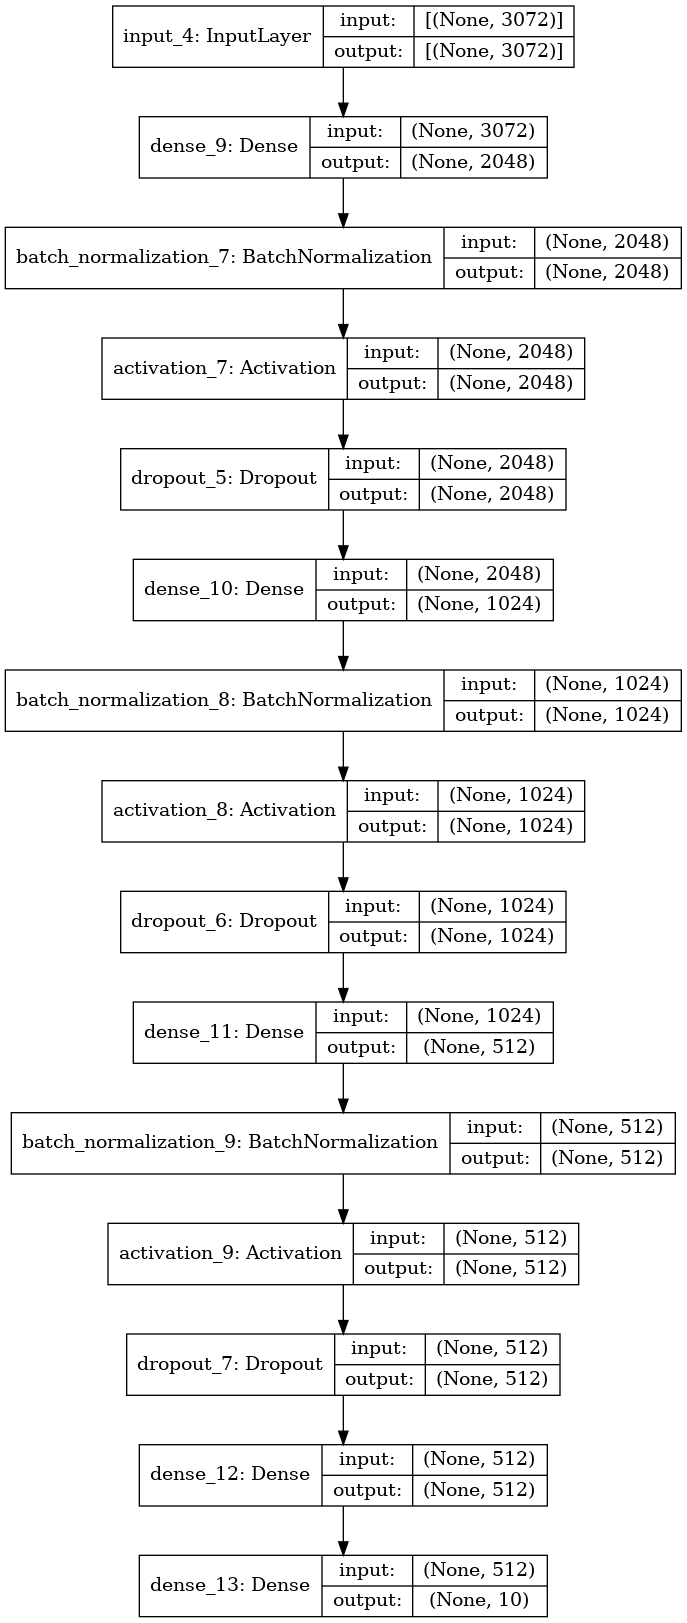

In [66]:
utils.plot_model(model, show_shapes=True)

In [67]:
# 모델 학습
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar_10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.0620 - accuracy: 0.2542 - val_loss: 1.7799 - val_accuracy: 0.3486
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8685 - accuracy: 0.3210 - val_loss: 1.7025 - val_accuracy: 0.3715
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7864 - accuracy: 0.3541 - val_loss: 1.6550 - val_accuracy: 0.3908
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7378 - accuracy: 0.3710 - val_loss: 1.5992 - val_accuracy: 0.4169
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6864 - accuracy: 0.3893 - val_loss: 1.5617 - val_accuracy: 0.4316
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6505 - accuracy: 0.4043 - val_loss: 1.5775 - val_accuracy: 0.4311
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6205 - accuracy: 0.4146 - val_loss: 1.5082 - val_accuracy:

In [68]:
# 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

    show_history(history)

In [69]:
# 모델 평가 및 예측
# 테스트 데이터셋을 이용해 모델을 평가합니다.

# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4164 - accuracy: 0.4954


[1.4163864850997925, 0.49540001153945923]